In [1]:
# Dependencies
import json
import requests
import random
import pandas as pd
import numpy as np
import time
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns

# Import Open Weather Map API key.
from config import api_key

In [2]:
# Declare variables describing the scope of lat/lng search for cities. 
# Lat ranges from -90 to 90. Lng ranges from -180 to 180.
lat = {'min': -90, 'max': 90}
lng = {'min': -180, 'max': 180}

# Create arrays containing increments of lat and long.
lat_values = np.arange(lat['min'], lat['max'], 0.01)
lng_values = np.arange(lng['min'], lng['max'], 0.01)

In [3]:

# Create an empty data frame to city and weather data 
column_names = ('city_name', 'country_code', 'rand_lat', 'rand_lng', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
cities_df = pd.DataFrame(columns = column_names)
cities_df

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [4]:
'''Query Citipy with random lat-long values until we collect our sample, and append weather
data via Open Weather Map API call.''' 

# Set the sample size.
sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

record = 0

# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
    
while len(cities_df) < sample_size:
    # Choose a random point within our lat-lng domain.
    rand_lat = random.choice(lat_values)
    rand_lng = random.choice(lng_values)
    # Call citipy's nearest_city() method to get a city object.
    city = citipy.nearest_city(rand_lat, rand_lng)
    city_name = city.city_name
    country_code = city.country_code
    # Call Open Weather Map API to obtain data and append it to df
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        print('City: %s. %s' % (weather_json['name'], url))
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        # Avoid repeating cities
        if city_name not in cities_df.city_name.values:
            print('Status code: %s. DF length is now: %d' % (str(weather_json["cod"]), len(cities_df)+1))
            # Append data to df columns
            cities_df.set_value(record, "city_name", city_name)
            cities_df.set_value(record, "country_code", country_code)
            cities_df.set_value(record, "rand_lat", rand_lat)
            cities_df.set_value(record, "rand_lng", rand_lng)
            cities_df.set_value(record, "Latitude", latitude)
            cities_df.set_value(record, "Longitude", longitude)
            cities_df.set_value(record, "Temp (F)", temp)
            cities_df.set_value(record, "Humidity (%)", humidity)
            cities_df.set_value(record, "Cloudiness (%)", cloud)
            cities_df.set_value(record, "Wind Speed (mph)", wind)

            record += 1
        
            # Wait between 1-4 seconds before next loop
            time.sleep(random.randint(1, 4))
        else:
            pass
    else:
        pass
    
print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

# Visualize df
cities_df.head()

City: Maceio. http://api.openweathermap.org/data/2.5/weather?q=maceio,br&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 1


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

City: Bluff. http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 2
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 3
City: Taoudenni. http://api.openweathermap.org/data/2.5/weather?q=taoudenni,ml&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 4
City: Bredasdorp. http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 5
City: Chokurdakh. http://api.openweathermap.org/data/2.5/weather?q=chokurdakh,ru&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 6
City: Port Elizabeth. http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&units=imperial&APPID=3114f788e259d786b212c15706c3035b


City: Saint-Joseph. http://api.openweathermap.org/data/2.5/weather?q=saint-joseph,re&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 46
City: Biak. http://api.openweathermap.org/data/2.5/weather?q=biak,id&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 47
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Kapaa. http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 48
City: Ancud. http://api.openweathermap.org/data/2.5/weather?q=ancud,cl&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 49
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf

City: Vila Franca do Campo. http://api.openweathermap.org/data/2.5/weather?q=vila franca do campo,pt&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 85
City: Namibe. http://api.openweathermap.org/data/2.5/weather?q=namibe,ao&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 86
City: Vaini. http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Roma. http://api.openweathermap.org/data/2.5/weather?q=roma,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 87
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Kem. http://api.openweathermap.org/data/2.5/weather?q=kem,ru&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 88
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q

City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Dakar. http://api.openweathermap.org/data/2.5/weather?q=dakar,sn&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 119
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Geraldton. http://api.openweathermap.org/data/2.5/weather?q=geraldton,ca&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 120
City: Avarua. http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Domoni. http://api.openweathermap.org/data/2.5/weather?q=domoni,km&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 121
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=

City: Lebu. http://api.openweathermap.org/data/2.5/weather?q=lebu,cl&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Santiago de Cao. http://api.openweathermap.org/data/2.5/weather?q=santiago de cao,pe&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 149
City: Barra dos Coqueiros. http://api.openweathermap.org/data/2.5/weather?q=barra dos coqueiros,br&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 150
City: Almaznyy. http://api.openweathermap.org/data/2.5/weather?q=almaznyy,ru&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 151
City: Bluff. http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Dikson. http://api.openweathermap.org/data/2.5/weather?q=dikson,ru&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 152
City: Rikitea. http://api.openweathe

City: Kodiak. http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 178
City: Taltal. http://api.openweathermap.org/data/2.5/weather?q=taltal,cl&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 179
City: Talnakh. http://api.openweathermap.org/data/2.5/weather?q=talnakh,ru&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 180
City: Neuquen. http://api.openweathermap.org/data/2.5/weather?q=neuquen,ar&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 181
City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuai

City: Along. http://api.openweathermap.org/data/2.5/weather?q=along,in&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 207
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Suluq. http://api.openweathermap.org/data/2.5/weather?q=suluq,ly&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 208
City: La Ronge. http://api.openweathermap.org/data/2.5/weather?q=la ronge,ca&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 209
City: Muhos. http://api.openweathermap.org/data/2.5/weather?q=muhos,fi&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 210
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Cidreira. http://api.openweathermap.org/data/2.5/wea

City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Ust-Kalmanka. http://api.openweathermap.org/data/2.5/weather?q=ust-kalmanka,ru&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 228
City: Cape Town. http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Kirakira. http://api.openweathermap.org/data/2.5/weather?q=kirakira,sb&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 229
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Puerto Ayora. http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=3114f788e259d786

City: Hamilton. http://api.openweathermap.org/data/2.5/weather?q=hamilton,us&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Sibiti. http://api.openweathermap.org/data/2.5/weather?q=sibiti,cg&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 252
City: Bredasdorp. http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Rawson. http://api.openweathermap.org/data/2.5/weather?q=rawson,ar&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 253
City: Alice Springs. http://api.openweathermap.org/data/2.5/weather?q=alice springs,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 254
City: Bredasdorp. http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Verkhoyansk. http://api.openweathermap.org/data/2.5/weather?q=verkhoyansk,ru&u

City: Kapaa. http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Necochea. http://api.openweathermap.org/data/2.5/weather?q=necochea,ar&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Georgetown. http://api.openweathermap.org/data/2.5/weather?q=georgetown,gy&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Qasigiannguit. http://api.openweathermap.org/data/2.5/weather?q=qasigiannguit,gl&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 280
City: Jamestown. http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Bluff. http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Hobart. http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Busselton. http://api.openweathermap.

City: Richards Bay. http://api.openweathermap.org/data/2.5/weather?q=richards bay,za&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Khatanga. http://api.openweathermap.org/data/2.5/weather?q=khatanga,ru&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Karratha. http://api.openweathermap.org/data/2.5/weather?q=karratha,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 298
City: New Norfolk. http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Nikolskoye. http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Bredasdorp. http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Daru. http://

City: Varhaug. http://api.openweathermap.org/data/2.5/weather?q=varhaug,no&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 323
City: Turukhansk. http://api.openweathermap.org/data/2.5/weather?q=turukhansk,ru&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 324
City: Bone. http://api.openweathermap.org/data/2.5/weather?q=bone,id&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 325
City: Qaanaaq. http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Arraial do Cabo. http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Victoria. http://api.openweathermap.org/data/2.5/weather?q=victoria,sc&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Georgetown. http://api.openweathermap.org/data/2.5/weather?q=georgetown,sh&units=i

City: Kaitangata. http://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 350
City: Upernavik. http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Oistins. http://api.openweathermap.org/data/2.5/weather?q=oistins,bb&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 351
City: Ribeira Grande. http://api.openweathermap.org/data/2.5/weather?q=ribeira grande,pt&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Tasiilaq. http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Souillac. http://api.openweathermap.org/data/2.5/weather?q=souillac,mu&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Harper. http://api.openweathermap.org/data/2.5/weather?q=harper,lr&units=imperial&APPID=3114f788e259d786b212c157

City: Carnarvon. http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Lucapa. http://api.openweathermap.org/data/2.5/weather?q=lucapa,ao&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 371
City: Bluff. http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Hilo. http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Am Timan. http://api.openweathermap.org/data/

City: Tazovskiy. http://api.openweathermap.org/data/2.5/weather?q=tazovskiy,ru&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Hami. http://api.openweathermap.org/data/2.5/weather?q=hami,cn&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 395
City: Genhe. http://api.openweathermap.org/data/2.5/weather?q=genhe,cn&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 396
City: Saskylakh. http://api.openweathermap.org/data/2.5/weather?q=saskylakh,ru&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Kamphaeng Phet. http://api.openweathermap.org/data/2.5/weather?q=kamphaeng phet,th&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 397
City: Salalah. http://api.openweathermap.org/data/2.5/weather?q=salalah,om&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Vaini. http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&APPID=31

City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Hithadhoo. http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Bandarbeyla. http://api.openweathermap.org/data/2.5/weather?q=bandarbeyla,so&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 416
City: Progreso. http://api.openweathermap.org/data/2.5/weather?q=progreso,mx&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 417
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Kodiak. http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&APPID=3114f788e259d786b212c15706c303

City: Bonnyville. http://api.openweathermap.org/data/2.5/weather?q=bonnyville,ca&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Alta Floresta. http://api.openweathermap.org/data/2.5/weather?q=alta floresta,br&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 435
City: La Ronge. http://api.openweathermap.org/data/2.5/weather?q=la ronge,ca&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Yining. http://api.openweathermap.org/data/2.5/weather?q=yining,cn&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 436
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Korla. http://api.openweathermap.org/data/2.5/weather?q=korla,cn&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Sta

City: Abha. http://api.openweathermap.org/data/2.5/weather?q=abha,sa&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 455
City: Mayo. http://api.openweathermap.org/data/2.5/weather?q=mayo,ca&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Port Macquarie. http://api.openweathermap.org/data/2.5/weather?q=port macquarie,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 456
City: Soledad. http://api.openweathermap.org/data/2.5/weather?q=soledad,co&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 457
City: Puerto del Rosario. http://api.openweathermap.org/data/2.5/weather?q=puerto del rosario,es&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 458
City: Hamilton. http://api.openweathermap.org/data/2.5/weather?q=hamilton,bm&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Casper. http://api.openweathermap.

City: Kaitangata. http://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Nikolskoye. http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Cape Town. http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Manacapuru. http://api.openweathermap.org/data/2.5/weather?q=manacapuru,br&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 475
City: Pyaozerskiy. http

City: Esperance. http://api.openweathermap.org/data/2.5/weather?q=esperance,au&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Faanui. http://api.openweathermap.org/data/2.5/weather?q=faanui,pf&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Bafq. http://api.openweathermap.org/data/2.5/weather?q=bafq,ir&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 494
City: Bethel. http://api.openweathermap.org/data/2.5/weather?q=bethel,us&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Bambous Virieux. http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Labuhan. http://api.openweathermap.org/data/2.5/weather?q=labuhan,id&units=imperial&APPID=3114f788e259d786b212c15706c3035b
Status code: 200. DF length is now: 495
City: Lebu. http://api.openweathermap.org/data/2.5/weather?q=lebu,cl&units=imperial&APPID=3114f788e259d786b212c15706c3035b
City: Souilla

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,maceio,br,-15.16,-30.15,-9.67,-35.74,77,73,75,10.29
1,bluff,nz,-85.82,177.34,-46.6,168.33,48.75,100,92,22.88
2,punta arenas,cl,-70.67,-90.81,-53.16,-70.91,41.95,95,20,16.11
3,taoudenni,ml,23.51,-4.55,22.68,-3.98,110.22,9,0,2.98
4,bredasdorp,za,-82.17,15.44,-34.53,20.04,57.2,93,12,9.69


In [5]:
#sanity check
len(cities_df)

500

In [7]:
# Save the DataFrame as a csv
cities_df.to_csv("Output/weatherpy_data.csv", encoding="utf-8", index=False)

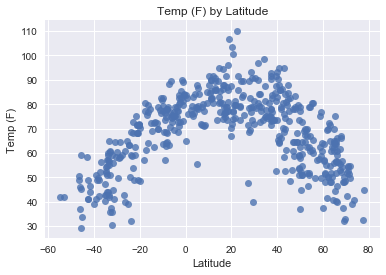

In [8]:
# Build a scatter plot City Latitude vs. Temperature
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Temp (F)", data=cities_df, fit_reg=False).set_title('Temp (F) by Latitude')

# Save the figure
plt.savefig("Output/lat_v_temp.png")

# Show plot
plt.show()

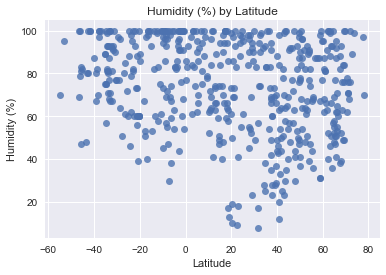

In [9]:

# Build a scatter plot City Latitude vs. Humidity# Build 
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Humidity (%)", data=cities_df, fit_reg=False).set_title('Humidity (%) by Latitude')

# Save the figure
plt.savefig("Output/lat_v_humidity.png")

# Show plot
plt.show()

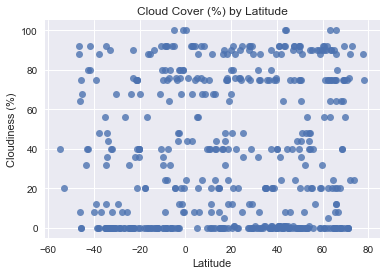

In [10]:
# Build a scatter plot City Latitude vs. Cloudiness
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Cloudiness (%)", data=cities_df, fit_reg=False).set_title('Cloud Cover (%) by Latitude')

# Save the figure
plt.savefig("Output/lat_v_cloud.png")

# Show plot
plt.show()

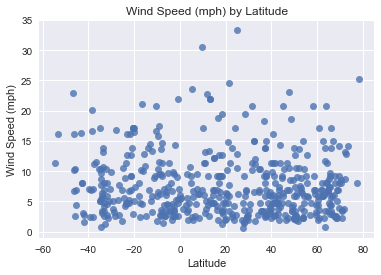

In [11]:
# Build a scatter plot City Latitude vs. Wind Speed
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Wind Speed (mph)", data=cities_df, fit_reg=False).set_title('Wind Speed (mph) by Latitude')

# Save the figure
plt.savefig("Output/lat_v_wind.png")

# Show plot
plt.show()